# SKLEARN basics

In [20]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

mnist_data = fetch_openml('mnist_784', version=1)
print(mnist_data.keys())

X, y = mnist_data['data'], mnist_data['target']


clf = SGDClassifier()
clf.fit(X, y)
score = clf.score(X, y)
print(score)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
0.8992285714285714


In [21]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], flip_y=0, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

clf = SGDClassifier()

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.965


# Overfitting Underfitting

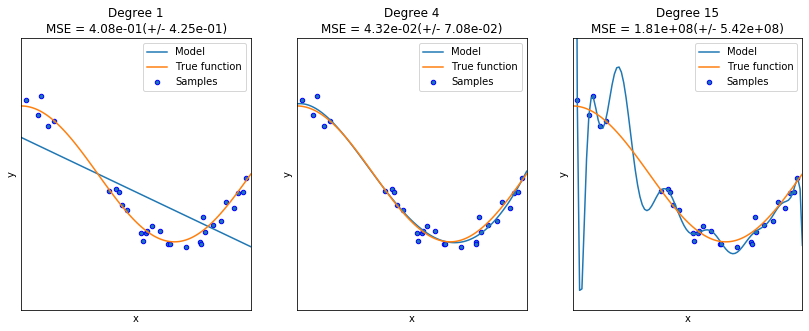

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


# Cross Validation

In [10]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

mnist_data = fetch_openml('mnist_784', version=1)
print(mnist_data.keys())

X, y = mnist_data['data'], mnist_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

clf = SGDClassifier()

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

clf = SGDClassifier()

cv_score_train = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
print(cv_score_train)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
0.8861428571428571
[0.85821429 0.88267857 0.87419643 0.88535714 0.86607143]


In [31]:
# advanced results
"""
[0.8872321428571428,
 0.8680357142857142,
 0.8607142857142858,
 0.860625,
 0.8460714285714286]
"""

[0.8872321428571428,
 0.8680357142857142,
 0.8607142857142858,
 0.860625,
 0.8460714285714286]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], flip_y=0, random_state=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)
# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=790, 1=10, Test: 0=200, 1=0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3, stratify=y)
# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=792, 1=8, Test: 0=198, 1=2


# Confusion Matrix

In [1]:
"""

TODO:
- include all needed files
- split dataset into train test datasets 80%/20%
- train classifier
- make cross validation prediction with 3/5 filds. Compare results

"""

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

mnist_data = fetch_openml('mnist_784', version=1)
print(mnist_data.keys())

X, y = mnist_data['data'], mnist_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = SGDClassifier()

y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5, verbose=1)

len(y_train_pred)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


56000


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.5min finished


In [2]:
"""

TODO:
  For mnist dataset loaded above:
- create confusion matrix
- plot confusion matrix with classes names on train dataset
- plot confusion matrix with classes name for test dataset
- example of plotting confusion matrix can be found under following link: 
  https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

- try different supervised classifers to get intuition about them

"""
from sklearn.metrics import confusion_matrix
class_names = mnist_data.target_names

print(confusion_matrix(y_train, y_train_pred))

[[5199    1   60   38    4   53   29    8   77   30]
 [   1 5842   73  137   10   48   11   17  136    9]
 [  59   41 4757  245   62   42   60   56  225   25]
 [  38    9  178 5036    8  230   11   46  110   62]
 [  12   24   74   66 4720  114   33   29  168  303]
 [  69   13   52  419   43 3967   67   14  289   70]
 [  51   22  123   21   25  163 5008    3   89    5]
 [  26   16   80  142   45   29    7 5075   60  359]
 [  38   72  157  449   35  475   29   28 4046  140]
 [  29   13   38  185  172  115    0  212  147 4642]]


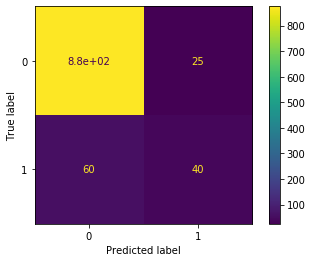

In [3]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

"""

TODO:
- for given dataset create and train classifer
- plot confusion matrix
- try different classifiers

"""

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.90, 0.10], flip_y=0, random_state=1)

clf = SGDClassifier()
clf.fit(X, y)

plot_confusion_matrix(clf, X, y)

# Precision

In [ ]:
"""

TODO:
- calculate precision score

- calculate cross validation prediction for simple dataset
- calcaulte precision score for mnist dataset ( this one needs cross_val_score)
- print both scores
- try different classifiers
- try differnet classification generated datasets from  https://scikit-learn.org/stable/modules/classes.html#samples-generator
- try different classification datasets from https://scikit-learn.org/stable/modules/classes.html#loaders

"""

from sklearn.metrics import precision_score

y_pred = cross_val_predict(clf, X, y, cv=5)
simple_precision = precision_score(y, y_pred)

mnist_precision = precision_score(y_train, y_train_pred, average='weighted')

print(simple_precision)
print(mnist_precision)

# Recall

In [ ]:
"""

TODO:
- calculate precision score

- calculate cross validation prediction for simple dataset
- calcaulte precision score for mnist dataset ( this one needs cross_val_score)
- print both scores
- try different classifiers
- try differnet classification generated datasets from  https://scikit-learn.org/stable/modules/classes.html#samples-generator
- try different classification datasets from https://scikit-learn.org/stable/modules/classes.html#loaders

"""

from sklearn.metrics import recall_score

y_pred = cross_val_predict(clf, X, y, cv=5)
simple_recall = recall_score(y, y_pred)

mnist_recall = recall_score(y_train, y_train_pred, average='weighted')

print(simple_recall)
print(mnist_recall)

# Precision Recall curve

In [3]:
"""
    Method to plot precisions and recalls
    along with legend and grid
"""

import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid(True)
    plt.legend(loc="upper right")
    [...] # highlight the threshold and add the legend, axis label, and grid

### SGDClassifier

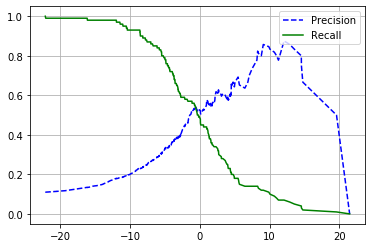

In [7]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

"""

TODO:
- for given dataset create and train classifer
- calcualte cross valiation score 
- calculate precision and recalls values using precision recall curve
- please try different classifiers

"""

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.90, 0.10], flip_y=0, random_state=1)

clf = SGDClassifier()

clf.fit (X, y)

y_scores = cross_val_predict(clf, X, y, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

#TODO 
# put code here
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### RandomForest Classifier

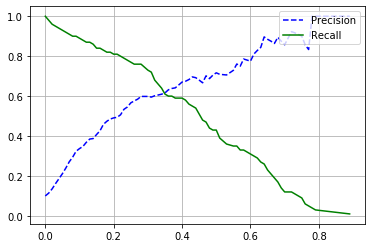

In [8]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

"""

TODO:
- for given dataset create and train classifer
- calcualte cross valiation score 
- calculate precision and recalls values using precision recall curve
- please try different classifiers

"""

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.90, 0.10], flip_y=0, random_state=1)

clf = RandomForestClassifier()

clf.fit (X, y)

y_probas = cross_val_predict(clf, X, y, cv=3,
                             method="predict_proba")

y_scores = y_probas[:, 1] 

precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

#TODO 
# put code here
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### MNIST dataset

In [ ]:
"""

TODO:
- repeat above example for differnet classifiers for mnist dataset splitted 80%/20%

"""

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

mnist_data = fetch_openml('mnist_784', version=1)
print(mnist_data.keys())

X, y = mnist_data['data'], mnist_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = SGDClassifier()

y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5, verbose=1)

print(len(y_train_pred))

# F1 score

In [ ]:
"""

TODO:
- for above examples of Precision and Recall add F1 score metric and compare all used classifiers based on it

"""

# FOR MNIST

from sklearn.metrics import f1_score

y_pred = cross_val_predict(clf, X, y, cv=5)
simple_recall = recall_score(y, y_pred)

mnist_recall = f1_score(y_train, y_train_pred, average='weighted')

print(simple_recall)
print(mnist_recall)

# ROC curve

solution for advanced can be found : https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html?highlight=roc

# Grid Search

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

"""
TODO:
- use all techniques from above and AdaBoost/RandomForestClassifier to find best set of parameters for MNISt dataset.
- because it can take long to computate, please use collab notebook to do this
- as metrics use precision, recall, f1score
- print results /report/best parmaeter set/roc curve
"""

# EXAMPLE USING SVM classification enstimator without printing roc curve/

print(__doc__)

mnist_data = fetch_openml('mnist_784', version=1)
print(mnist_data.keys())

X, y = mnist_data['data'], mnist_data['target']

print("dataset loaded")

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
